## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja logistyczna

Perceptron bazujący na modelu sztucznego neuronu jest dobrym algorytmem, aby wyrobić sobie pewną intuicję, jednak nie jest on powszechnie stosowany do rozwiązywania problemów klasyfikacji. Głównym problemem jest wykorzystywana w nim funkcja aktywacji oraz, w konsekwencji, sposób uczenia. Funkcja skokowa Heaviside'a jest nieróżniczkowalna w punkcie $x=0$, a jej pochodna wynosi $0$ w każdym innym punkcie. Powoduje to, że metody gradientowe (w tym metoda gradientu prostego) nie mogą być stosowane do optymalizacji wag. Wiele algorytmów, w tym implementowana regresja liniowa, wykorzystuje metody gradientowe do optymalizacji. Aby to było możliwe w przypadku perceptronu, należy zmienić funkcję aktywacji na taką, która będzie różniczkowalna w każdym punkcie.

### Funkcja sigmoidalna

Funkcją, która spełnia powyższe wymagania jest funkcja sigmoidalna, zwana również funkcją logistyczną. Dana jest wzorem:

$$f(x) = \frac{1}{1+e^{-x}}$$

Poniższy obraz przedstawia wykres funkcji sigmoidalnej.

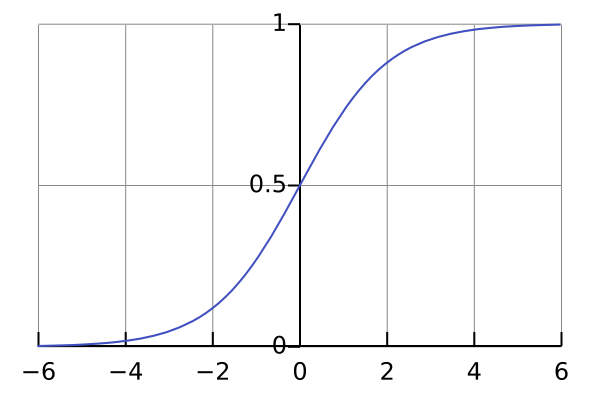

Tak jak w przypadku funkcji skokowej Heaviside'a, funkcja mapuje dowolną wartość rzeczywistą na wartości z przedziału $(0,1)$. Wartość funkcji może być rozumiana jako prawdopodobieństwo wyniku pozytywnego. Przykładowo, jeśli $f(x) = 0.9$, to prawdopodobieństwo $1$ jest równe $90\%$. Czyli jeśli mamy problem klasyfikacji binarnej, a $1$ oznacza np. obecność wirusa grypy w organiźmie, to możemy powiedzieć, że na $90\%$ jesteśmy chorzy na grypę. Warto również zauważyć, że funkcja logistyczna zmierza do $1$ dla wartości dodatnich, a dla wartości ujemnych zmierza do $0$. Zmiana predykcji jest w punkcie $0$, gdzie wartość funkcji wynosi $0.5$.

Zaletą funkcji sigmoidalnej jest łatwa do obliczenia pochodna:

$$f(x)' = f(x)(1-f(x))$$

Algorytm, który wykorzystuje tę funkcję aktywacji nazywany jest **regresją logistyczną**. Nazwa może być myląca i może sugerować, że służy on do rozwiązywania problemów regresji, ale w rzeczywistości wykorzystywany jest do problemów klasyfikacji.

Finalnie, nasza hipoteza będzie wyglądać następująco.

$$h_w(x) = f(\sum_{i=0}^{n}{w_ix_i})$$

$$s = \sum_{i=0}^{n}{w_ix_i}$$

$$f(s) = \frac{1}{1+e^{-s}}$$

### Funkcja błędu

Poznaliśmy już jedną funkcję błędu, która wykorzystywana była do obliczenia błędu regresji liniowej (i wielomianowej). W przypadku regresji logistycznej nie możemy z niej skorzystać, ponieważ regresja logistyczna spowoduje, że taka funkcja będzie miała wiele lokalnych minimum, a co za tym idzie, znalezienie optymalnego zestawu wag będzie bardzo trudne. W związku z tym, konieczne jest znalezienie innej funkcji błędu. Powszechna funkcja błędu, która jest wykorzystywana w algorytmie regresji logistycznej ma następującą formę.

$$
Cost(h_w(x), y) =
\begin{cases}
-log(h_w(x))        &   \mathrm{if} \ y=1,\\
-log(1 - h_w(x))    &   \mathrm{if} \ y=0
\end{cases}
$$

Gdzie $y$ jest prawdziwą wartością.

<table>
    <tr>
        <td> 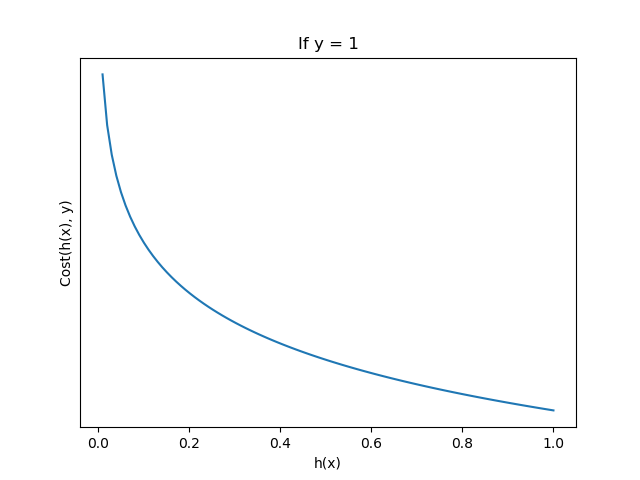 </td>
        <td> 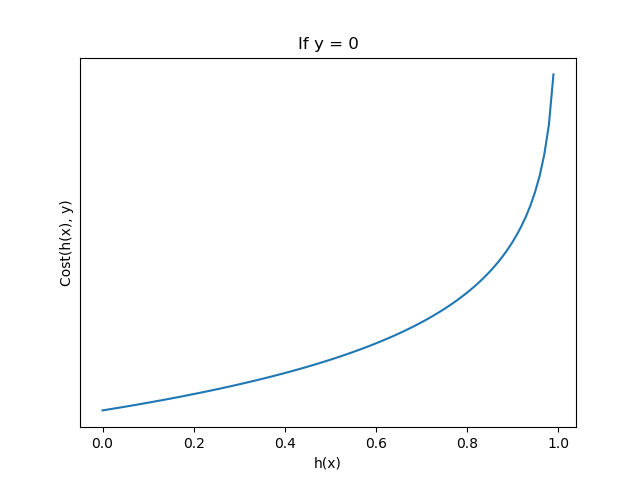 </td>
    </tr>
</table>

Czyli jeśli $y=0$, to funkcja kosztu będzie mieć wartość $0$, tylko jeśli hipoteza będzie mieć wartość $0$. Jeśli $h_w(x)$ zmierza do $1$, to funkcja kosztu zmierza do nieskończoności. 

Analogicznie, jeśli $y=1$, to funkcja kosztu będzie równa $0$ tylko, gdy hipoteza będzie równa $1$. Jeśli $h_w(x)$ będzie zmierzać do $0$, to wartość funkcji kosztu będzie zmierzać do nieskończoności.

Zapis powyższej funkcji błędu może zostać uproszczony do jednego równania:

$$Cost(h_w(x), y) = -y\:log(h_w(x)) - (1 - y)\:log(1 - h_w(x))$$

Dlaczego można tak zrobić? Zauważmy, że jeśli $y=0$, to pierwsza część równania się zeruje, zostaje jedynie druga. Natomiast jeśli $y=1$, to zeruje się druga część równania, zostawiając jedynie pierwszą.

### Trenowanie modelu

Wzór na funkcję błędu dla regresji logistycznej można zapisać jako:

$$J(w) = \frac{1}{m} \sum_{i=1}^{m}Cost(h_w(x^{(i)}),y^{(i)}) = - \frac{1}{m} [\sum_{i=1}^{m} y^{(i)} log(h_w(x^{(i)})) + (1 - y^{(i)}) log(1 - h_w(x^{(i)}))]$$

Dobór wag przeprowadzony zostanie z wykorzystaniem algorytmu gradientu prostego. Tak jak w przypadku algorytmu regresji liniowej, w każdej epoce obliczone zostaną nowe wagi, które powinny skutkować zmniejszeniem błędu. W algorytmie perceptronu wagi akutalizowane były po każdej próbce uczącej, natomiast tutaj po jednym przejściu zestawu uczącego. Istnieją różne warianty ilości próbek, po których wagi są aktualizowane, jednak dla uproszczenia wybieramy cały zbiór.

Dobra wiadomość jest taka, że proces aktualizacji wag wygląda praktycznie identycznie, jak miało to miejsce w przypadku algorytmu regresji liniowej. Pochodna funkcji błędu dla $j$-tej wagi ma postać: 

$$\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum^{m}_{i=1} (h_w(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

Zatem wagi akutalizujemy tak, jak robiliśmy to uprzednio:

$$w_j = w_j - \alpha \frac{\partial J(w)}{\partial w_j} = w_j - \frac{\alpha}{m} \sum^{m}_{i=1} (h_w(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

Proces aktualizacji wag wynika bezpośrednio z obliczenia pochodnej funkcji błędu względem wag. W tym notatniku nie będziemy przechodzić przez cały ten proces. Dla osób, które chcą poznać matematyczne detale, przekształcenia opisane są np. [tutaj](https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17).

_Powyższy zapis jest w formie iteracyjnej, a w notaniku z regresją liniową był w formie macierzowej. Te dwa zapisy są równoznaczne i warto znać i rozumieć obie formy._

### Regresja logistyczna a perceptron

Powyższy algorytm w formie z sigmoidalną funkcją aktywacji bardzo często wykorzystywany jest jako podstawowy element wielowarstwowych sieci neuronowych. Jego dobre zrozumienie znacznie ułatwi zrozumienie sposobu działania sieci neuronowych. Porównując ze sobą działania algorytmu regresji logistycznej, a wcześniej implementowanego perceptronu, na pojedynczych neuronach nie widać róznic. Obie implementacje służą do rozwiązywania problemów klasyfikacji w zbiorach liniowo separowalnych. Ich celem jest wyznaczenie prostej separującej próbki pochodzące z różnych klas. Różnica pojawia się w momencie, gdy chcemy stworzyć strukturę złożoną z wielu neuronów. Wykorzystanie w tym celu perceptronu nie jest możliwe, ponieważ sieci neuronowe trenowane są najcześciej z wykorzystaniem algorytmu opartego o obliczenie gradientu funkcji błędu.

Struktury złożone z wielu neuronów mogą rozwiązywać problemy nieliniowo separowalne. Daje to duże możliwości i tłumaczy duże zainteresowanie sieciami neuronowymi. Innym sposobem na rozwiązanie problemu nieliniowo separowalnego może być rozwinięcie hipotezy o wielomianową formę, tak jak robiliśmy to w przypadku regresji wielomianowej.

### Zadanie 1

Zaimplementuj opisany algorytm regresji logistycznej, który będzie skutecznie klasyfikował próbki z liniowo separowalnego zestawu danych. 

In [182]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

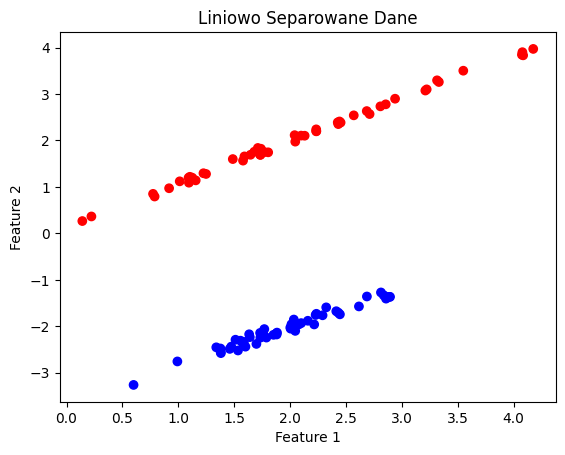

In [183]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Liniowo Separowane Dane")
plt.show()

In [184]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def compute_cost(h,y):
    m = y.size
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [185]:
def train_logistic_regression(X, y, learning_rate=0.05, epochs=1000):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    
    w = np.zeros(n + 1)
    costs = []
    
    for epoch in range(epochs):
        z = np.dot(X, w)
        h = sigmoid(z)
        
        cost = compute_cost(h, y)
        costs.append(cost)
        
        gradient = (1 / m) * np.dot(X.T, (h - y))
        
        w -= learning_rate * gradient
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs} - Cost: {cost}")
        
    return w, costs


Epoch 0/1000 - Cost: 0.6931471805599453
Epoch 100/1000 - Cost: 0.07644099228001852
Epoch 200/1000 - Cost: 0.04491589836389197
Epoch 300/1000 - Cost: 0.03299115968075741
Epoch 400/1000 - Cost: 0.026530614042478962
Epoch 500/1000 - Cost: 0.022410388816882287
Epoch 600/1000 - Cost: 0.019523152790478077
Epoch 700/1000 - Cost: 0.017371574276168273
Epoch 800/1000 - Cost: 0.015697178734558663
Epoch 900/1000 - Cost: 0.014351500890196258


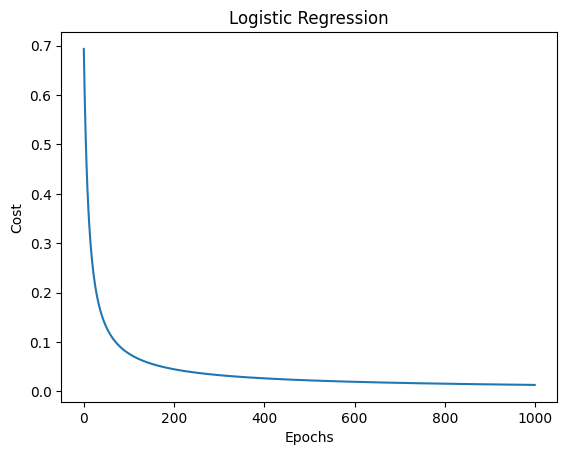

In [186]:
w, costs = train_logistic_regression(X, y)

plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression')
plt.show()

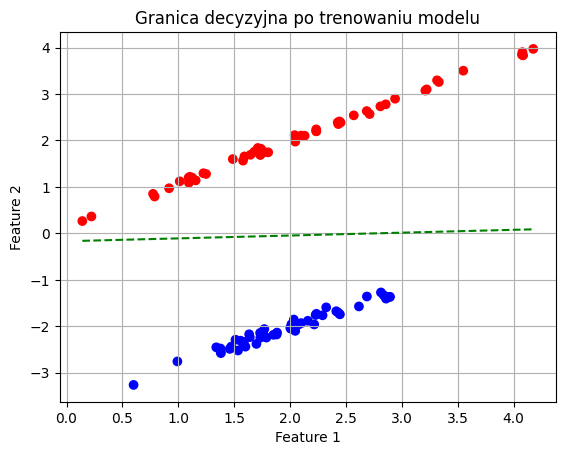

In [187]:
def predict(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    z = np.dot(X, w)
    h = sigmoid(z)
    return h.round()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')
x_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_boundary = -(w[0] + w[1] * x_boundary) / w[2]
plt.plot(x_boundary, y_boundary, color='green', linestyle='--')
plt.grid(True)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Granica decyzyjna po trenowaniu modelu")
plt.show()


### Zadanie 2

Wczytaj zbiór danych znajdujący się w pliku Ankieta.csv, stwórz wykres próbek. Następnie stwórz 3 wykresy na których przedstawisz jak zmieniała się granica decyzyjna zaimplementowanego algorytmu regresji logistycznej na przestrzeni epok. Porównaj wynik z algorytmem perceptronu (zarówno czas działania jak i jakość wyznaczonej granicy decyzyjnej)

**Uwaga:** Przed podaniem danych na wejście klasyfikatora należy je znormalizować. Zbyt duże wartości powodują, że logarytmy liczą się niepoprawnie (log(0) daje NaN). Dla zainteresowanych wyjaśnienie dostępne jest [tutaj](https://stackoverflow.com/questions/35419882/cost-function-in-logistic-regression-gives-nan-as-a-result)

In [188]:
ds = pd.read_csv('datasets/Ankieta.csv')
ds.head()
label_encoder = LabelEncoder()
ds['Plec'] = label_encoder.fit_transform(ds['Plec'])
X = ds[['Waga', 'Wzrost']].values
y = ds[['Plec']].values

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


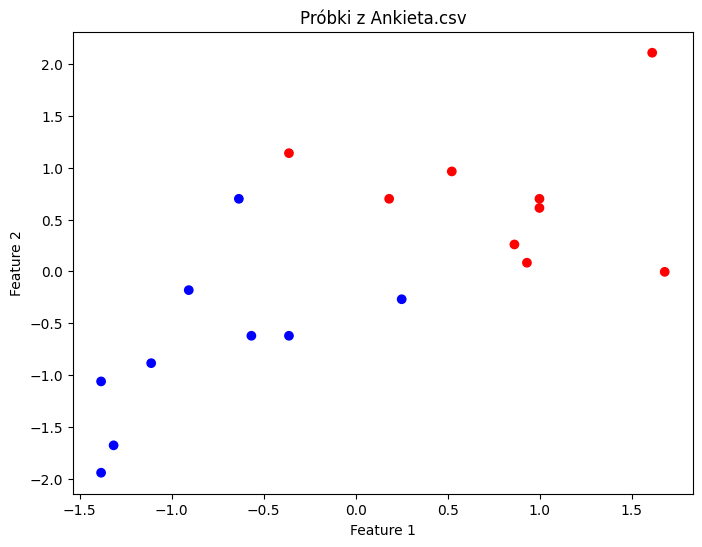

In [189]:
plt.figure(figsize=(8,6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='bwr', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Próbki z Ankieta.csv")
plt.show()

Model trenował przez 0.01 sekund.


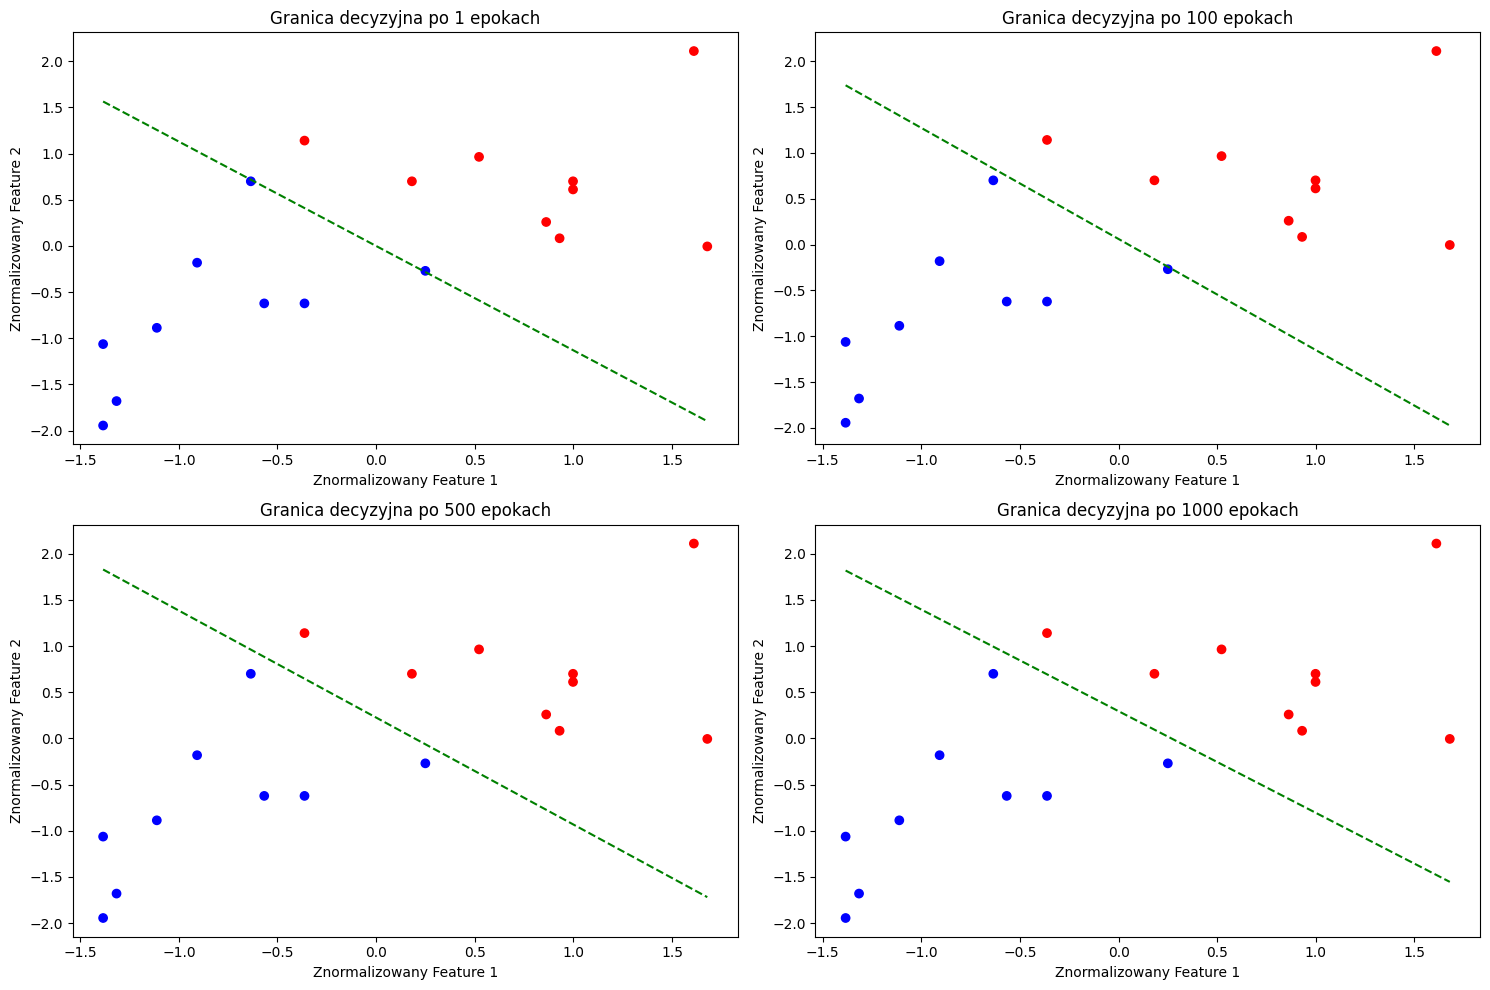

In [190]:
def train_logistic_regression_track_boundaries(X, y, learning_rate=0.1, epochs=1000, checkpoints=[1, 100, 500, 1000]):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X)) 
    w = np.zeros(n + 1)  
    weights_history = []  

    y = y.reshape(-1, 1)
    start_time = time.time()

    for epoch in range(epochs):
        z = np.dot(X, w)
        h = sigmoid(z).reshape(-1, 1)
        gradient = (1 / m) * np.dot(X.T, (h - y).flatten())  
        w -= learning_rate * gradient  

        if epoch + 1 in checkpoints:
            weights_history.append(w.copy())
    
    end_time = time.time()

    training_time = end_time - start_time
    return w, weights_history, checkpoints, training_time

w_final, weights_history, checkpoints, training_time = train_logistic_regression_track_boundaries(X_normalized, y, learning_rate=0.1, epochs=1000)

print(f"Model trenował przez {training_time:.2f} sekund.")

plt.figure(figsize=(15, 10))

for i, w in enumerate(weights_history):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y.flatten(), cmap='bwr', marker='o')
    x_boundary = np.linspace(min(X_normalized[:, 0]), max(X_normalized[:, 0]), 100)
    y_boundary = -(w[0] + w[1] * x_boundary) / w[2]
    plt.plot(x_boundary, y_boundary, color='green', linestyle='--')
    plt.xlabel("Znormalizowany Feature 1")
    plt.ylabel("Znormalizowany Feature 2")
    plt.title(f"Granica decyzyjna po {checkpoints[i]} epokach")

plt.tight_layout()
plt.show()

In [191]:
def compute_accuracy(X, y, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  
    predictions = sigmoid(np.dot(X, w)) >= 0.5  
    accuracy = np.mean(predictions.flatten() == y.flatten()) 
    return accuracy

final_accuracy = compute_accuracy(X_normalized, y, w_final)
print(f"Końcowa dokładność modelu: {final_accuracy * 100:.2f}%")

Końcowa dokładność modelu: 100.00%


Na podstawie dostępego datasetu regeresji logistycznej potrzebny jest krótszy czas (LG: 0.01s, PERC: 0.09s) do otrzymania takiej samej dokładności  

### Zadanie 3

Wykorzystaj stworzony algorym w celu znalezienia granicy decyzyjnej będącej płaszczyzną w trójwymiarowej przestrzeni. Zbiór danych znajduje się w pliku o nazwie 3D_perceptron.csv. Stwórz wykresy analogicznie jak w zadaniu 2. Porównaj wynik z algorytmem perceptronu.

In [192]:
ds = pd.read_csv('datasets/3D_perceptron.csv')
X = ds[['x1', 'x2', 'x3']].values
y = ds['y'].values

X_normalized = scaler.fit_transform(X)

weights, costs = train_logistic_regression(X_normalized, y, learning_rate=0.1, epochs=1000)

predictions = predict(X_normalized, weights)



Epoch 0/1000 - Cost: 0.6931471805599452
Epoch 100/1000 - Cost: 0.0596936435916287
Epoch 200/1000 - Cost: 0.030644712643633838
Epoch 300/1000 - Cost: 0.02074592647204999
Epoch 400/1000 - Cost: 0.015746116133403917
Epoch 500/1000 - Cost: 0.012723435360765123
Epoch 600/1000 - Cost: 0.010695287674816036
Epoch 700/1000 - Cost: 0.009238257098614361
Epoch 800/1000 - Cost: 0.008139737867279027
Epoch 900/1000 - Cost: 0.007281184498523721


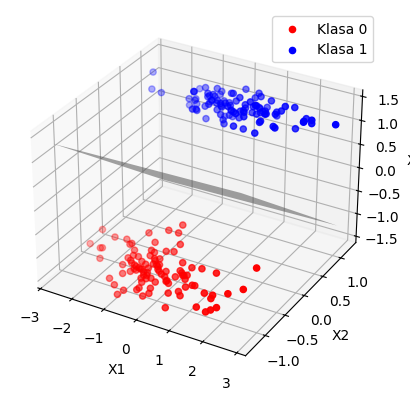

In [193]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

class_0 = X_normalized[y.flatten() == 0]
class_1 = X_normalized[y.flatten() == 1]

ax.scatter(class_0[:, 0], class_0[:, 1], class_0[:, 2], color='red', label='Klasa 0')
ax.scatter(class_1[:, 0], class_1[:, 1], class_1[:, 2], color='blue', label='Klasa 1')

x1_range = np.linspace(X_normalized[:, 0].min(), X_normalized[:, 0].max(), 50)
x2_range = np.linspace(X_normalized[:, 1].min(), X_normalized[:, 1].max(), 50)

x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

w0, w1, w2, w3 = weights
x3_grid = -(w0 + w1 * x1_grid + w2 * x2_grid) / w3

ax.plot_surface(x1_grid, x2_grid, x3_grid, color='gray', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

ax.legend()
plt.show()

### Zadanie 4

Zaimplementu test jednostkowy sprawdzający czy błąd spada wraz z epokami.

In [194]:
import unittest

class TestLogisticRegression(unittest.TestCase):
    
    def test_cost_decreases_with_epochs(self):
        weights, costs = train_logistic_regression(X_normalized, y, learning_rate=0.1, epochs=1000)
        
        for i in range(1, len(costs)):
            self.assertLess(costs[i], costs[i-1], f"Błąd nie spada w epoce {i}.")
            
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

Epoch 0/1000 - Cost: 0.6931471805599452


.
----------------------------------------------------------------------
Ran 1 test in 0.034s

OK


Epoch 100/1000 - Cost: 0.0596936435916287
Epoch 200/1000 - Cost: 0.030644712643633838
Epoch 300/1000 - Cost: 0.02074592647204999
Epoch 400/1000 - Cost: 0.015746116133403917
Epoch 500/1000 - Cost: 0.012723435360765123
Epoch 600/1000 - Cost: 0.010695287674816036
Epoch 700/1000 - Cost: 0.009238257098614361
Epoch 800/1000 - Cost: 0.008139737867279027
Epoch 900/1000 - Cost: 0.007281184498523721


### Zadanie 5

Zaproponuj i oblicz miarę skuteczności algorytmu regresji logistycznej. Wynik należy podać w % (ile próbek poprawnie zaklasyfikował algorytm) 

In [195]:
def calculate_accuracy(predictions, y):
    
    correct_predictions = np.sum(predictions == y)
    
    total_samples = len(y)
    
    accuracy = (correct_predictions / total_samples) * 100
    
    return accuracy

accuracy = calculate_accuracy(predictions, y)

print(f"Skuteczność algorytmu (dokładność): {accuracy:.2f}%")

Skuteczność algorytmu (dokładność): 100.00%


### Zadanie 6

Jak współczynnik uczenia alpha wypływa na wynik oraz ilość epok jakie należy zastosować? Porównaj minimum 5 różnych wartości współczynnika alpha oraz sformułuj wnioski.

Trening dla alpha = 0.001
Epoch 0/1000 - Cost: 0.6931471805599452
Epoch 100/1000 - Cost: 0.6467214540070946
Epoch 200/1000 - Cost: 0.6046871548344984
Epoch 300/1000 - Cost: 0.5666029178527091
Epoch 400/1000 - Cost: 0.5320612443261777
Epoch 500/1000 - Cost: 0.5006902997391789
Epoch 600/1000 - Cost: 0.47215388046791956
Epoch 700/1000 - Cost: 0.4461501232238706
Epoch 800/1000 - Cost: 0.4224094211145075
Epoch 900/1000 - Cost: 0.4006918995793945
Trening dla alpha = 0.01
Epoch 0/1000 - Cost: 0.6931471805599452
Epoch 100/1000 - Cost: 0.3803809042350786
Epoch 200/1000 - Cost: 0.24844896968146238
Epoch 300/1000 - Cost: 0.1811974060940419
Epoch 400/1000 - Cost: 0.1416105787404271
Epoch 500/1000 - Cost: 0.11586893702381894
Epoch 600/1000 - Cost: 0.09790922634454169
Epoch 700/1000 - Cost: 0.08471443156345526
Epoch 800/1000 - Cost: 0.07463231749201825
Epoch 900/1000 - Cost: 0.06668843585868761
Trening dla alpha = 0.1
Epoch 0/1000 - Cost: 0.6931471805599452
Epoch 100/1000 - Cost: 0.0596936435916287


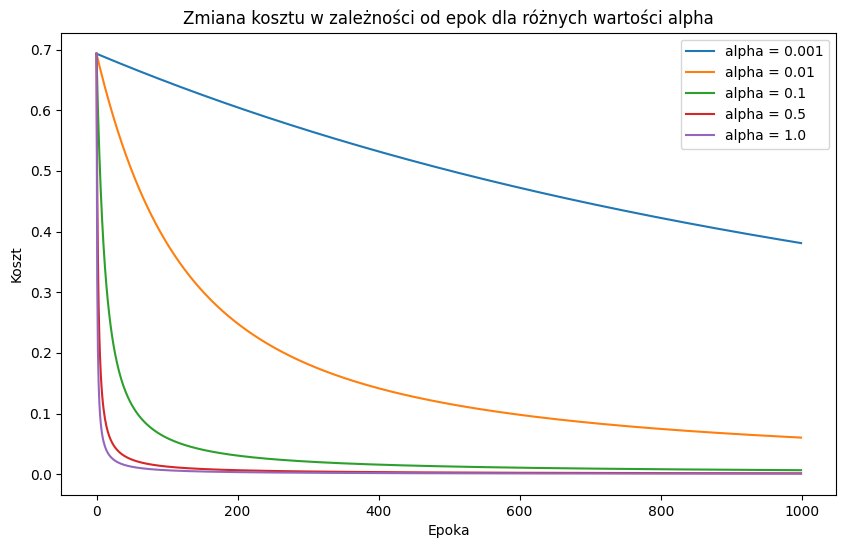

In [198]:
alphas = [0.001, 0.01, 0.1, 0.5, 1.0]
results = []
for alpha in alphas:
    print(f"Trening dla alpha = {alpha}")
    weights, costs = train_logistic_regression(X_normalized, y, learning_rate=alpha, epochs=1000)
    
    predictions = predict(X_normalized, weights)
    
    accuracy = calculate_accuracy(predictions, y)
    
    results.append({
        'alpha': alpha,
        'accuracy': accuracy,
        'final_cost': costs[-1],
        'epochs': len(costs)
    })

results_df = pd.DataFrame(results)
print("\nWyniki dla różnych wartości alpha:")
print(results_df)

plt.figure(figsize=(10, 6))
for alpha in alphas:
    weights, costs = train_logistic_regression(X_normalized, y, learning_rate=alpha, epochs=1000)
    plt.plot(costs, label=f'alpha = {alpha}')

plt.xlabel('Epoka')
plt.ylabel('Koszt')
plt.title('Zmiana kosztu w zależności od epok dla różnych wartości alpha')
plt.legend()
plt.show()

W zależności jaki współczynnik alfa się wybiera model uczy się wolniej lub szybciej dla wyższych współczynników alfa liczba epok powinna być mniejsza, ponieważ może dojść do przeuczenia się modelu 